In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from model_utils import *

In [3]:
train_X = np.loadtxt('train_x.csv', delimiter = ',')
train_Y = np.loadtxt('train_y.csv', delimiter = ',').reshape(1, train_X.shape[1])

test_X = np.loadtxt('test_x.csv', delimiter = ',')
test_Y = np.loadtxt('test_y.csv', delimiter = ',').reshape(1, test_X.shape[1])

In [5]:
print("Shape of train_X : ", train_X.shape)
print("Shape of train_Y : ", train_Y.shape)
print("Shape of test_X : ", test_X.shape)
print("Shape of test_Y : ", test_Y.shape)

Shape of train_X :  (2, 211)
Shape of train_Y :  (1, 211)
Shape of test_X :  (2, 200)
Shape of test_Y :  (1, 200)


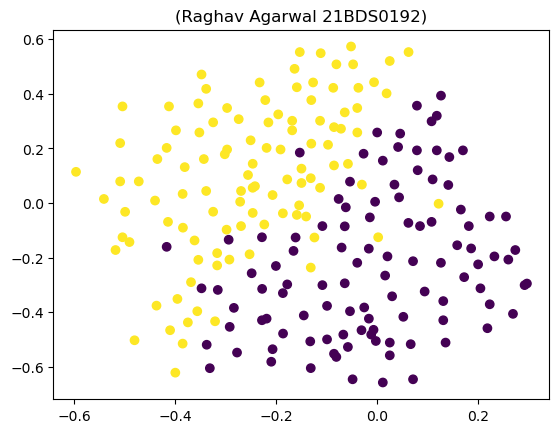

In [7]:
plt.scatter(train_X[0], train_X[1], c=train_Y[0])
plt.title('(Raghav Agarwal 21BDS0192)')
plt.show()

In [9]:
def model(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000):

    grads = {}
    cost_list = []
    m = X.shape[1]

    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)

        cost = cost_function(a3, Y)

        grads = backward_propagation(X, Y, cache)

        parameters = update_parameters(parameters, grads, learning_rate)

        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)

    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()

    return parameters

Raghav Agarwal 21BDS0192

Cost after iteration  0  is :  0.695492074816334
Cost after iteration  1000  is :  0.20184182115796895
Cost after iteration  2000  is :  0.18441223013086186
Cost after iteration  3000  is :  0.1713659461827604
Cost after iteration  4000  is :  0.16284851751502244
Cost after iteration  5000  is :  0.1548632017965596
Cost after iteration  6000  is :  0.13690360735304846
Cost after iteration  7000  is :  0.10807316054338033
Cost after iteration  8000  is :  0.10360896073220088
Cost after iteration  9000  is :  0.09196948743868938


C:\Users\ASUS\model_utils.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))
C:\Users\ASUS\model_utils.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))


Cost after iteration  10000  is :  0.09960291092538799
Cost after iteration  11000  is :  nan
Cost after iteration  12000  is :  nan
Cost after iteration  13000  is :  nan
Cost after iteration  14000  is :  nan
Cost after iteration  15000  is :  nan
Cost after iteration  16000  is :  nan
Cost after iteration  17000  is :  nan
Cost after iteration  18000  is :  nan
Cost after iteration  19000  is :  nan
Cost after iteration  20000  is :  nan


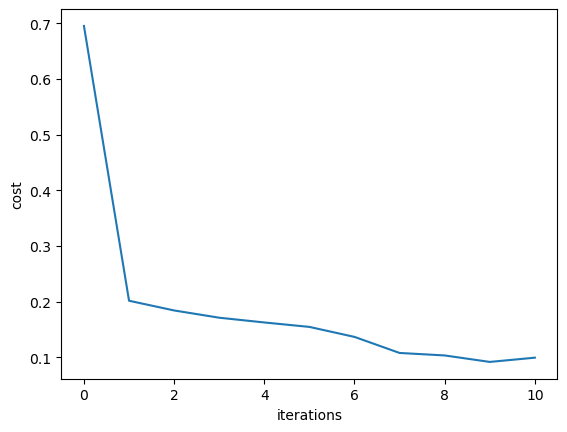

In [11]:
print("Raghav Agarwal 21BDS0192\n")
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]
parameters = model(train_X, train_Y, layers_dims, learning_rate, num_iterations)

Accuracy of the model on Train dataset is :  100.0 %
Accuracy of the model on Test dataset is :  93.0 %


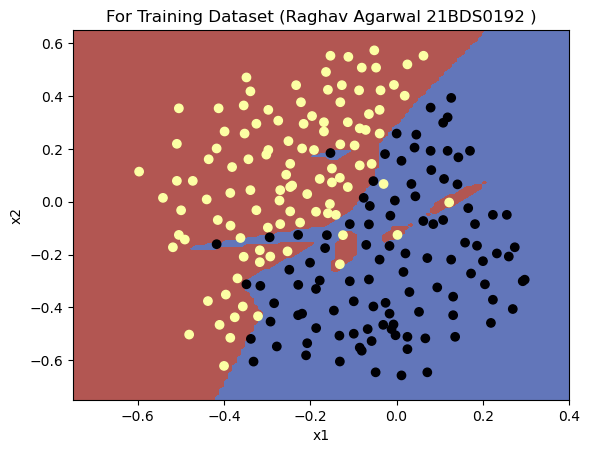

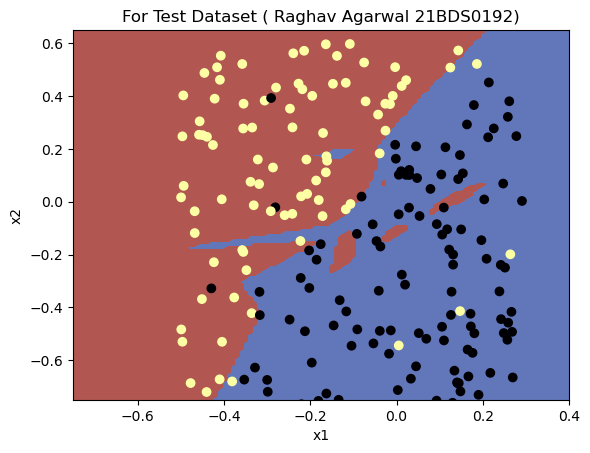

In [13]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset (Raghav Agarwal 21BDS0192 )")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset ( Raghav Agarwal 21BDS0192)")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)

In [15]:
def cost_function_with_L2(A3, Y, parameters, lambd):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))
    L2_regularization_cost = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))

    cost = cost + L2_regularization_cost

    return cost

In [17]:
def backward_propagation_with_L2(X, Y, cache, lambd):

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd*W3)/m
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd*W2)/m
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd*W1)/m
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients


In [19]:
def model_with_L2(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000, lambd = 0.7):

    grads = {}
    cost_list = []
    m = X.shape[1]

    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)

        cost = cost_function_with_L2(a3, Y, parameters, lambd)

        grads = backward_propagation_with_L2(X, Y, cache, lambd)

        parameters = update_parameters(parameters, grads, learning_rate)

        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)

    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()

    return parameters

Raghav Agarwal 21BDS0192
Cost after iteration  0  is :  0.7206843507906392
Cost after iteration  1000  is :  0.2269738887700477
Cost after iteration  2000  is :  0.21353433817781542
Cost after iteration  3000  is :  0.2037148787061183
Cost after iteration  4000  is :  0.1949156017894168
Cost after iteration  5000  is :  0.20115704522746045
Cost after iteration  6000  is :  0.17913908555329805
Cost after iteration  7000  is :  0.17284537564748495
Cost after iteration  8000  is :  0.17103716751245018
Cost after iteration  9000  is :  0.1660136850602924
Cost after iteration  10000  is :  0.16721266085798292
Cost after iteration  11000  is :  0.16655438269882683
Cost after iteration  12000  is :  0.16581501980588156
Cost after iteration  13000  is :  0.16357956571277335
Cost after iteration  14000  is :  0.15758092575465055
Cost after iteration  15000  is :  0.16459692984178342
Cost after iteration  16000  is :  0.17064695446669442
Cost after iteration  17000  is :  0.1679846125392227
Cost

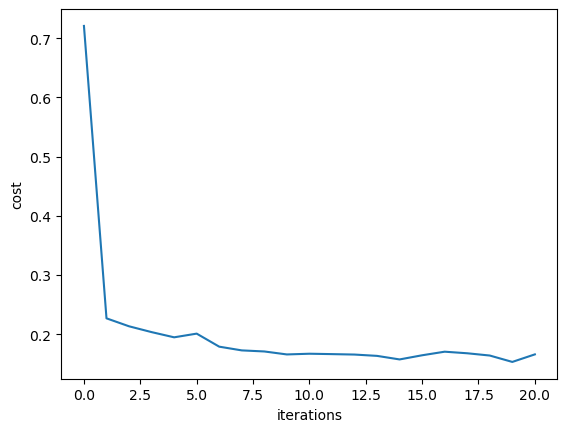

In [21]:
print("Raghav Agarwal 21BDS0192")
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]
parameters = model_with_L2(train_X, train_Y, layers_dims, learning_rate, num_iterations, lambd = 0.1)

Accuracy of the model on Train dataset is :  94.79 %
Accuracy of the model on Test dataset is :  95.0 %


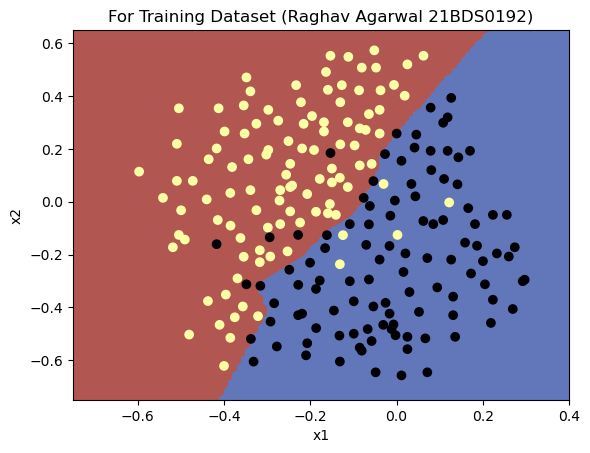

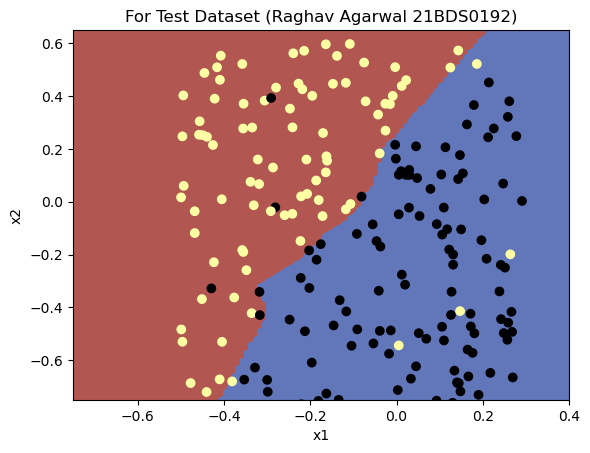

In [23]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset (Raghav Agarwal 21BDS0192)")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset (Raghav Agarwal 21BDS0192)")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)